In [45]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal
import graphviz



In [46]:
df = pd.read_csv('Project Dataset/previous_application.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# check the shape of the dataset
df.shape

(1670214, 37)

In [48]:
# check for null
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [49]:
# check how many duplicated row in the dataset
df.duplicated().sum()

0

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


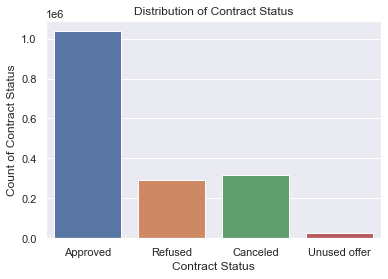

In [50]:
# Use matplotlib to virually shows that the differece between all types of application result
import matplotlib
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [51]:
# drop the cancled loan application cuz it does not make any contribution to our reseach topic
# and mark Approved and Unused offers as approved since they got accepted
# and mark Refused loan as 0
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Approved', 1)
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Refused', 0)
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Unused offer', 1)
df.drop(df[df['NAME_CONTRACT_STATUS'] =='Canceled'].index, inplace = True)


In [52]:
#since we are not yet interested in the reject reason, drop it for now
#'NAME_SELLER_INDUSTRY'
df.drop('CODE_REJECT_REASON', axis=1, inplace=True)
# we are not interested in how approved loan is paid back now, drop it
df.drop('NAME_PAYMENT_TYPE', axis=1, inplace=True)

df.drop(['SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE'
        ,'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace=True)

In [53]:
df.drop('RATE_DOWN_PAYMENT', axis=1, inplace=True)

In [54]:
# check if the Canceled loan still exist
df['NAME_CONTRACT_STATUS'].value_counts()

1    1063217
0     290678
Name: NAME_CONTRACT_STATUS, dtype: int64

In [55]:
# check the shape of the dataset again, obviously, the canceled data is dropped
df.shape

(1353895, 26)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


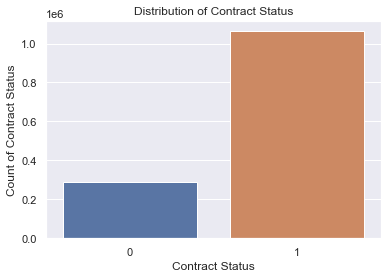

In [56]:
# show the histogram again, we now only have approved abd refused application
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


In [57]:
# convert text type data into numerical data
# df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
#                                  'NAME_CASH_LOAN_PURPOSE','NAME_TYPE_SUITE','NAME_CLIENT_TYPE',
#                                 'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
#                                 'CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NFLAG_INSURED_ON_APPROVAL'], drop_first=True)

In [58]:
#Function to calculate meta-data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [59]:
#calculating meta-data for application_data
app_meta_data=meta_data(df)
app_meta_data.head(20)

,Total,Percent,Unique,Data_Type
RATE_INTEREST_PRIVILEGED,1347944,99.560453,25,float64
RATE_INTEREST_PRIMARY,1347944,99.560453,148,float64
AMT_DOWN_PAYMENT,580168,42.851772,29272,float64
NAME_TYPE_SUITE,514066,37.969414,7,object
AMT_GOODS_PRICE,79945,5.904815,93857,float64
AMT_ANNUITY,66430,4.906584,357271,float64
PRODUCT_COMBINATION,31,0.002290,17,object
AMT_CREDIT,1,0.000074,86714,float64
NAME_CONTRACT_TYPE,0,0.000000,4,object
NAME_YIELD_GROUP,0,0.000000,5,object


In [60]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(app_meta_data[(app_meta_data.Percent<57)].index)
application_data=df[cols_to_keep]
application_data.describe()

,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,DAYS_DECISION,SK_ID_CURR,AMT_APPLICATION,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,SK_ID_PREV
count,7.737270e+05,1.273950e+06,1.287465e+06,1.353894e+06,1.353895e+06,1.353895e+06,1.353895e+06,1.353895e+06,1.353895e+06,1.353895e+06
mean,6.677055e+03,2.241259e+05,1.583806e+04,2.362824e+05,-1.030568e+03,2.783419e+05,2.108643e+05,9.956422e-01,1.258860e+01,1.915117e+06
std,2.040063e+04,3.105519e+05,1.469066e+04,3.324398e+05,7.906878e+02,1.028059e+05,3.058214e+05,6.586964e-02,3.336954e+00,5.339880e+05
min,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000001e+06
25%,0.000000e+00,5.035500e+04,6.294870e+03,4.819050e+04,-1.540000e+03,1.893320e+05,4.500000e+04,1.000000e+00,1.000000e+01,1.448900e+06
50%,1.651500e+03,1.106100e+05,1.125000e+04,1.119825e+05,-7.760000e+02,2.786610e+05,9.895500e+04,1.000000e+00,1.200000e+01,1.912135e+06
75%,7.749000e+03,2.295000e+05,2.041218e+04,2.608965e+05,-3.880000e+02,3.674645e+05,2.250000e+05,1.000000e+00,1.500000e+01,2.378540e+06
max,3.060045e+06,6.905160e+06,4.180581e+05,6.905160e+06,-1.000000e+00,4.562550e+05,6.905160e+06,1.000000e+00,2.300000e+01,2.845382e+06


In [61]:
#deal with missing AMT_ANNUITY values
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                      66430
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                580168
AMT_GOODS_PRICE                  79945
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_INTEREST_PRIMARY          1347944
RATE_INTEREST_PRIVILEGED       1347944
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_TYPE_SUITE                 514066
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
NAME_SELLER_INDUSTRY                 0
NAME_YIELD_GROUP                     0
PRODUCT_COMBINATION      

In [62]:
# get the average annuity of approved applications and refused applications
average_approved_AMT_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']==1)])['AMT_ANNUITY'].mean()
average_Refused_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']==0)])['AMT_ANNUITY'].mean()
print("the average annuity of approved applications is ", average_approved_AMT_ANNUITY)
print("the average annuity of refused applications is ", average_Refused_ANNUITY)

the average annuity of approved applications is  14716.329625721522
the average annuity of refused applications is  20498.16027384101


In [63]:
#it seems like we have to fill something into the null values
#some AMT_ANNUITY is empty, I will replace the the average AMT_ANNUITY based on its NAME_CONTRACT_STATUS

df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY'].isnull()==True) & (df['NAME_CONTRACT_STATUS'] == 1) ), average_approved_AMT_ANNUITY,df['AMT_ANNUITY'] )
df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY'].isnull()==True) & (df['NAME_CONTRACT_STATUS'] == 0) ), average_Refused_ANNUITY,df['AMT_ANNUITY'] )

In [64]:
df.head(30)
#AMT_ANNUITY data are all filled

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,DAYS_DECISION,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430000,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,-73,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615000,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,-164,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735000,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,-301,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335000,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,-512,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395000,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,-781,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930000,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,-684,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
10,1715995,447712,Cash loans,11368.620000,270000.0,335754.0,NaN,270000.0,FRIDAY,7,...,-735,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
11,2257824,161140,Cash loans,13832.775000,211500.0,246397.5,NaN,211500.0,FRIDAY,10,...,-815,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
12,2330894,258628,Cash loans,12165.210000,148500.0,174361.5,NaN,148500.0,TUESDAY,15,...,-860,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
13,1397919,321676,Consumer loans,7654.860000,53779.5,57564.0,0.0,53779.5,SUNDAY,15,...,-408,Unaccompanied,New,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_action,POS household without interest


In [65]:
# delete the row that miss AMT_CREDIT data
df = df.dropna( how='any',subset=['AMT_CREDIT'])
df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                580167
AMT_GOODS_PRICE                  79944
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_INTEREST_PRIMARY          1347943
RATE_INTEREST_PRIVILEGED       1347943
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_TYPE_SUITE                 514065
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
NAME_SELLER_INDUSTRY                 0
NAME_YIELD_GROUP                     0
PRODUCT_COMBINATION      

In [66]:
# # make missing downpayments to zero
# #delete
# df['AMT_DOWN_PAYMENT'] = np.where(((df['AMT_DOWN_PAYMENT'].isnull()==True)), 0,df['AMT_DOWN_PAYMENT'])
# df.isnull().sum()

In [67]:
#client might not tell the goods' price, so just keep missing AMT_GOODS_PRICE values empty 

In [68]:
# #make missing RATE_DOWN_PAYMENT to zero since the AMT_DOWN_PAYMENT is zero
# df['AMT_DOWN_PAYMENT'] = np.where(((df['RATE_DOWN_PAYMENT'].isnull()==True)), 0,df['RATE_DOWN_PAYMENT'])
# df.isnull().sum()
df=df.drop(['AMT_DOWN_PAYMENT','AMT_DOWN_PAYMENT'],1)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


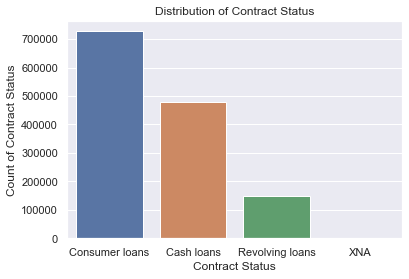

In [69]:
# how many types of loan types?
sns.countplot(df.NAME_CONTRACT_TYPE)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [70]:
# delete rows which has missing NAME_TYPE_SUITE and NFLAG_INSURED_ON_APPROVAL
# missing NAME_TYPE_SUITE means the borrower does not tell Who accompanied client when 
# applying for the loan application, and missing NFLAG_INSURED_ON_APPROVAL means borrower does
# not say about weather he requested insurance during the loan application
df.dropna(subset=['NAME_TYPE_SUITE','AMT_GOODS_PRICE'],inplace=True)
df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_INTEREST_PRIMARY          839678
RATE_INTEREST_PRIVILEGED       839678
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
NAME_SELLER_INDUSTRY                0
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION                 0
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


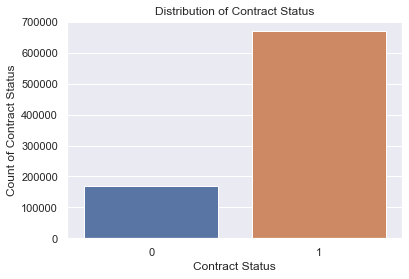

In [71]:
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


In [72]:
# get the total amount of approved and refused applications
approved=df[df.NAME_CONTRACT_STATUS==1]
refused=df[df.NAME_CONTRACT_STATUS==0]

In [73]:
#get the percentage
percentage_approved=(len(approved)*100)/len(df)
percentage_refused=(len(refused)*100)/len(df)
print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,3),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,3),"%")

The Percentage of people whose loans have been Approved is: 79.772 %
The Percentage of people whose loans have been Refused is: 20.228 %


In [74]:
#build a function to disaply the numbers of value in a column sorted by refused and approved 
#applications
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    plt.show()

In [75]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

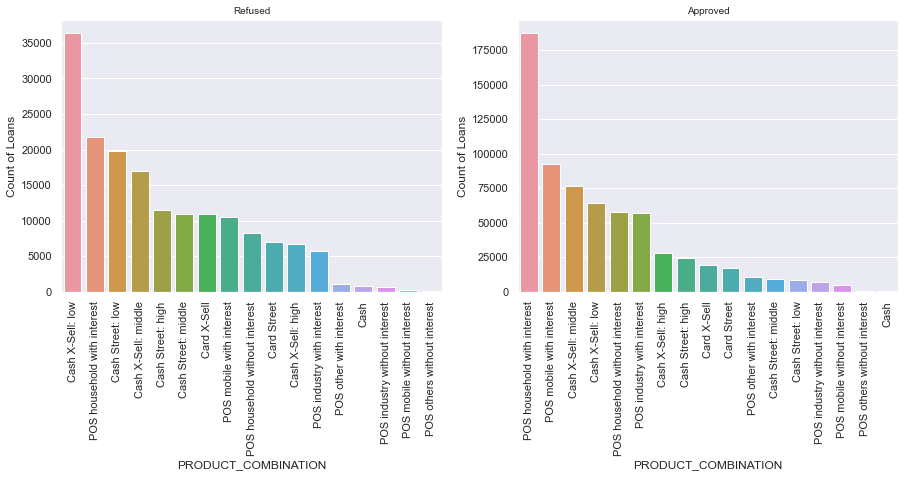

In [76]:
plot_charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)
#we can see that most applications got refused because those borrows just ask for cash
#and most approved application is for mortgage and mobile

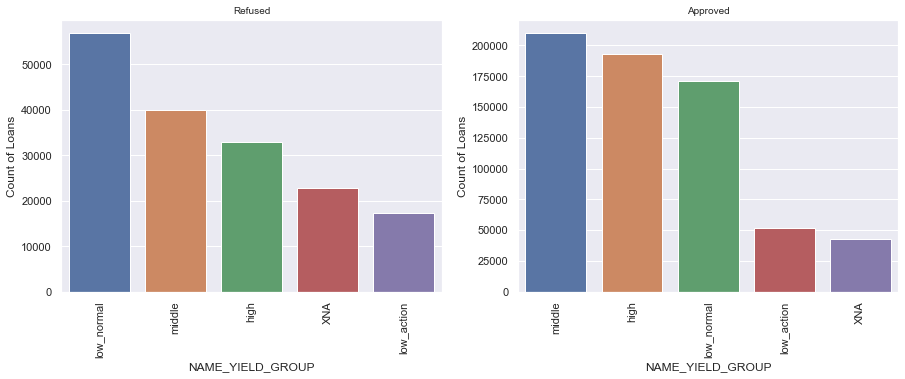

In [77]:
plot_charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)
#we can see low interest rate application is likely to get refused.

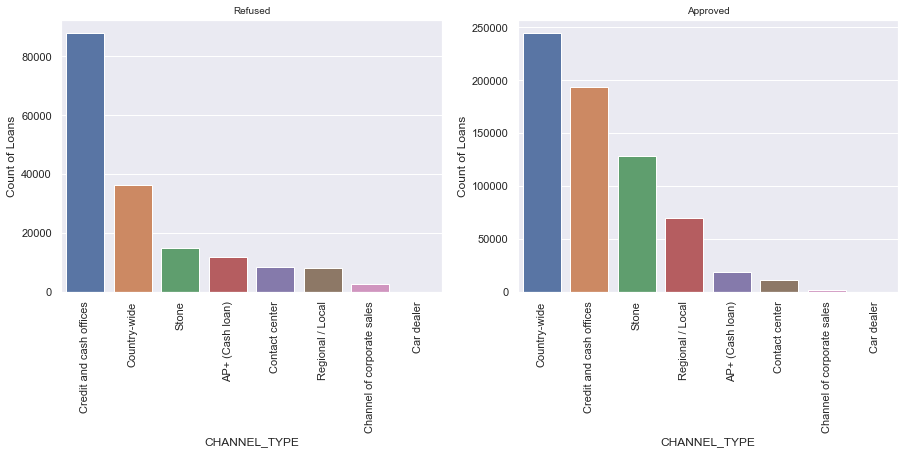

In [78]:
plot_charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

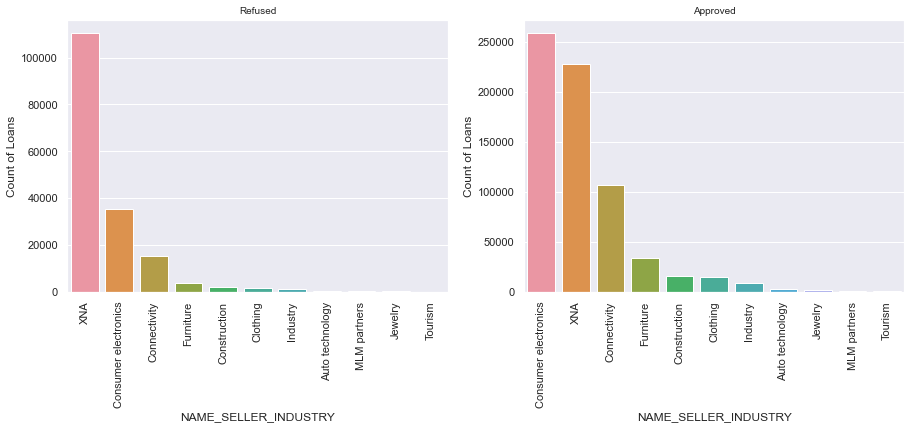

In [79]:
plot_charts('NAME_SELLER_INDUSTRY', label_rotation=True,horizontal_layout=True)

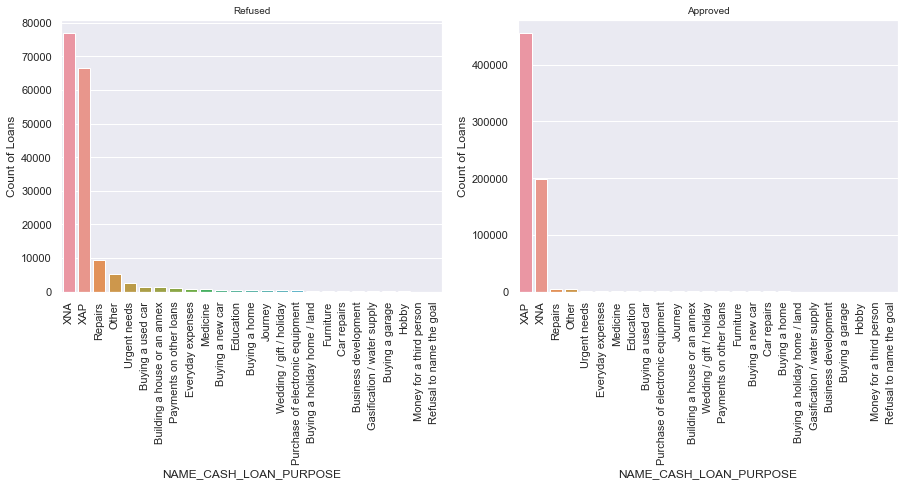

In [80]:
plot_charts('NAME_CASH_LOAN_PURPOSE', label_rotation=True,horizontal_layout=True)

In [81]:
#sns.pairplot(df, hue='NAME_CONTRACT_STATUS');

In [82]:
#drop interest rate column since most of them are missing
df = df.drop('RATE_INTEREST_PRIMARY', 1)
df = df.drop('RATE_INTEREST_PRIVILEGED', 1)
df = df.drop('SK_ID_PREV', 1)
df = df.drop('SK_ID_CURR', 1)
df.isnull().sum()

NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [83]:
df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,DAYS_DECISION,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,...,-164,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,...,-301,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
5,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,...,-684,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
10,Cash loans,11368.620,270000.0,335754.0,270000.0,FRIDAY,7,Y,1,XNA,...,-735,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
11,Cash loans,13832.775,211500.0,246397.5,211500.0,FRIDAY,10,Y,1,XNA,...,-815,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle


In [84]:
df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT'
                                ,'NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY'
                                ,'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP'
                                ,'PRODUCT_COMBINATION','NAME_CASH_LOAN_PURPOSE'], drop_first=True)

In [85]:
for col_name in df.columns: 
    print(f"'{col_name}',")

'AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'NFLAG_LAST_APPL_IN_DAY',
'NAME_CONTRACT_STATUS',
'DAYS_DECISION',
'NAME_SELLER_INDUSTRY',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'FLAG_LAST_APPL_PER_CONTRACT_Y',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Audio/Video',
'NAME_GOODS_CATEGORY_Auto Accessories',
'NAME_GOODS_CATEGORY_Clothing and Accessories',
'NAME_GOODS_CATEGORY_Computers',
'NAME_GOODS_CATEGORY_Construction Materials',
'NAME_GOO

In [95]:
#prepare datas for build
selected_features = ['AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'NFLAG_LAST_APPL_IN_DAY',
'DAYS_DECISION',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'FLAG_LAST_APPL_PER_CONTRACT_Y',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Audio/Video',
'NAME_GOODS_CATEGORY_Auto Accessories',
'NAME_GOODS_CATEGORY_Clothing and Accessories',
'NAME_GOODS_CATEGORY_Computers',
'NAME_GOODS_CATEGORY_Construction Materials',
'NAME_GOODS_CATEGORY_Consumer Electronics',
'NAME_GOODS_CATEGORY_Direct Sales',
'NAME_GOODS_CATEGORY_Education',
'NAME_GOODS_CATEGORY_Fitness',
'NAME_GOODS_CATEGORY_Furniture',
'NAME_GOODS_CATEGORY_Gardening',
'NAME_GOODS_CATEGORY_Homewares',
'NAME_GOODS_CATEGORY_House Construction',
'NAME_GOODS_CATEGORY_Insurance',
'NAME_GOODS_CATEGORY_Jewelry',
'NAME_GOODS_CATEGORY_Medical Supplies',
'NAME_GOODS_CATEGORY_Medicine',
'NAME_GOODS_CATEGORY_Mobile',
'NAME_GOODS_CATEGORY_Office Appliances',
'NAME_GOODS_CATEGORY_Other',
'NAME_GOODS_CATEGORY_Photo / Cinema Equipment',
'NAME_GOODS_CATEGORY_Sport and Leisure',
'NAME_GOODS_CATEGORY_Tourism',
'NAME_GOODS_CATEGORY_Vehicles',
'NAME_GOODS_CATEGORY_Weapon',
'NAME_GOODS_CATEGORY_XNA',
'NAME_PORTFOLIO_Cash',
'NAME_PORTFOLIO_POS',
'NAME_PORTFOLIO_XNA',
'NAME_PRODUCT_TYPE_walk-in',
'NAME_PRODUCT_TYPE_x-sell',
'CHANNEL_TYPE_Car dealer',
'CHANNEL_TYPE_Channel of corporate sales',
'CHANNEL_TYPE_Contact center',
'CHANNEL_TYPE_Country-wide',
'CHANNEL_TYPE_Credit and cash offices',
'CHANNEL_TYPE_Regional / Local',
'CHANNEL_TYPE_Stone',
'NAME_YIELD_GROUP_high',
'NAME_YIELD_GROUP_low_action',
'NAME_YIELD_GROUP_low_normal',
'NAME_YIELD_GROUP_middle',
'PRODUCT_COMBINATION_Card X-Sell',
'PRODUCT_COMBINATION_Cash',
'PRODUCT_COMBINATION_Cash Street: high',
'PRODUCT_COMBINATION_Cash Street: low',
'PRODUCT_COMBINATION_Cash Street: middle',
'PRODUCT_COMBINATION_Cash X-Sell: high',
'PRODUCT_COMBINATION_Cash X-Sell: low',
'PRODUCT_COMBINATION_Cash X-Sell: middle',
'PRODUCT_COMBINATION_POS household with interest',
'PRODUCT_COMBINATION_POS household without interest',
'PRODUCT_COMBINATION_POS industry with interest',
'PRODUCT_COMBINATION_POS industry without interest',
'PRODUCT_COMBINATION_POS mobile with interest',
'PRODUCT_COMBINATION_POS mobile without interest',
'PRODUCT_COMBINATION_POS other with interest',
'PRODUCT_COMBINATION_POS others without interest',
'NAME_CASH_LOAN_PURPOSE_Business development',
'NAME_CASH_LOAN_PURPOSE_Buying a garage',
'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
'NAME_CASH_LOAN_PURPOSE_Buying a home',
'NAME_CASH_LOAN_PURPOSE_Buying a new car',
'NAME_CASH_LOAN_PURPOSE_Buying a used car',
'NAME_CASH_LOAN_PURPOSE_Car repairs',
'NAME_CASH_LOAN_PURPOSE_Education',
'NAME_CASH_LOAN_PURPOSE_Everyday expenses',
'NAME_CASH_LOAN_PURPOSE_Furniture',
'NAME_CASH_LOAN_PURPOSE_Gasification / water supply',
'NAME_CASH_LOAN_PURPOSE_Hobby',
'NAME_CASH_LOAN_PURPOSE_Journey',
'NAME_CASH_LOAN_PURPOSE_Medicine',
'NAME_CASH_LOAN_PURPOSE_Money for a third person',
'NAME_CASH_LOAN_PURPOSE_Other',
'NAME_CASH_LOAN_PURPOSE_Payments on other loans',
'NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment',
'NAME_CASH_LOAN_PURPOSE_Refusal to name the goal',
'NAME_CASH_LOAN_PURPOSE_Repairs',
'NAME_CASH_LOAN_PURPOSE_Urgent needs',
'NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday',
'NAME_CASH_LOAN_PURPOSE_XAP',
'NAME_CASH_LOAN_PURPOSE_XNA']

X = df[selected_features]
y = df['NAME_CONTRACT_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Lenght of our Training data: (671829, 107) 
Length of our Testing data: (167958,)


In [96]:
y_train.value_counts()

1    536042
0    135787
Name: NAME_CONTRACT_STATUS, dtype: int64

In [97]:
y_train.isna().sum()


0

In [98]:
y_train.dtype

dtype('O')

In [99]:
y_train.astype(int).value_counts()


1    536042
0    135787
Name: NAME_CONTRACT_STATUS, dtype: int64

In [100]:
y_test = y_test.astype(int)


In [115]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train,y_train.astype(int))

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

Accuracy Score: 0.838859
Precision Score: 0.871912
Recall Score: 0.935224
F1 Score: 0.902459
AUC Score: 0.827572


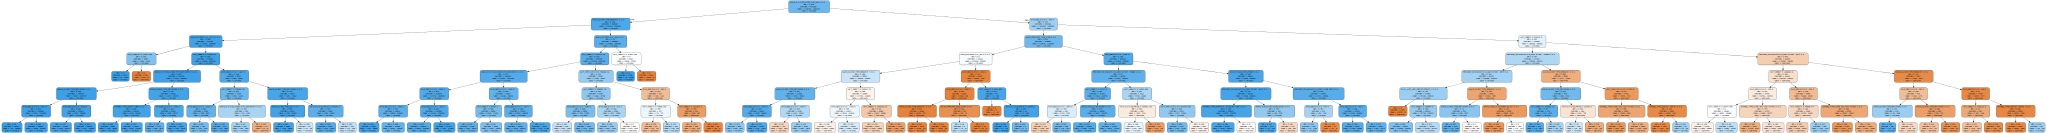

In [111]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['Approved','refused'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph



# 